In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<div align="center">

## Team Members: Aniket Tiwari, Bibek Paul
## Roll No: MDS202308 , MDS202317 
## AML Assignment - 02  

</div>


## Task - 01

- Import libraries

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

- Read dataset

In [119]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Conver|t labels to binary
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Split data into training and testing sets

In [120]:
X_train, X_val, y_train, y_val = train_test_split(data['message'], data['label'], test_size=0.3, random_state=20)

- Tokenize and pad sequences

In [121]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

- Find out the maximum length of the documents for each row to pad well 

In [122]:
max_len_tokens = 0
X_train_text_to_seq = tokenizer.texts_to_sequences(X_train)

for val in X_train_text_to_seq:
    temp_len = len(val)
    if max_len_tokens < temp_len:
        max_len_tokens = temp_len
        
print("Train Max token length : ", max_len_tokens)

max_len_tokens = 0
X_val_text_to_seq = tokenizer.texts_to_sequences(X_val)
for val in X_val_text_to_seq:
    temp_len = len(val)
    if max_len_tokens < temp_len:
        max_len_tokens = temp_len
        
print("Validation Max token length : ",max_len_tokens)

Train Max token length :  162
Validation Max token length :  181


In [123]:
X_train_seq = pad_sequences(X_train_text_to_seq, maxlen=max_len_tokens)
X_val_seq = pad_sequences(X_val_text_to_seq, maxlen=max_len_tokens)

vocab_size = len(tokenizer.word_index) + 1
vocab_size

7353

- Shapes

In [124]:
X_train_seq[0].shape, X_val_seq[0].shape

((181,), (181,))

- Function to compile and train a model

In [152]:
def compile_and_train_model(model, X_train, y_train, X_val, y_val):
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    return model, history

- Define RNN model

In [131]:
rnn_model = Sequential([
    Input(shape=(max_len_tokens,)),  
    Embedding(vocab_size, 64),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 181, 64)           470592    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 473,729
Trainable params: 473,729
Non-trainable params: 0
_________________________________________________________________


- Define LSTM model

In [155]:
lstm_model = Sequential([
    Input(shape=(max_len_tokens,)),
    Embedding(vocab_size, 64),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 181, 64)           470592    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 483,041
Trainable params: 483,041
Non-trainable params: 0
_________________________________________________________________


- Compile and Train model

In [132]:
rnn_model, rnn_history = compile_and_train_model(rnn_model, X_train_seq, y_train, X_val_seq, y_val)

Epoch 1/10
122/122 [==============================] - 14s 106ms/step - loss: 0.4109 - accuracy: 0.8703 - val_loss: 0.1259 - val_accuracy: 0.9605
Epoch 2/10
122/122 [==============================] - 12s 101ms/step - loss: 0.0649 - accuracy: 0.9828 - val_loss: 0.4523 - val_accuracy: 0.7889
Epoch 3/10
122/122 [==============================] - 13s 104ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 0.0623 - val_accuracy: 0.9827
Epoch 4/10
122/122 [==============================] - 12s 102ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.0876 - val_accuracy: 0.9785
Epoch 5/10
122/122 [==============================] - 12s 102ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0719 - val_accuracy: 0.9827
Epoch 6/10
122/122 [==============================] - 13s 104ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0838 - val_accuracy: 0.9815
Epoch 7/10
122/122 [==============================] - 12s 102ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0760 - val_ac

In [156]:
lstm_model, lstm_history = compile_and_train_model(lstm_model, X_train_seq, y_train, X_val_seq, y_val)

Epoch 1/10
122/122 [==============================] - 3s 16ms/step - loss: 0.4060 - accuracy: 0.8724 - val_loss: 0.0928 - val_accuracy: 0.9797
Epoch 2/10
122/122 [==============================] - 2s 12ms/step - loss: 0.0564 - accuracy: 0.9883 - val_loss: 0.0612 - val_accuracy: 0.9821
Epoch 3/10
122/122 [==============================] - 2s 12ms/step - loss: 0.0179 - accuracy: 0.9972 - val_loss: 0.0725 - val_accuracy: 0.9839
Epoch 4/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0628 - val_accuracy: 0.9821
Epoch 5/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0879 - val_accuracy: 0.9821
Epoch 6/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0790 - val_accuracy: 0.9833
Epoch 7/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0748 - val_accuracy: 0.9844

- Predict models

In [157]:
rnn_preds = (rnn_model.predict(X_val_seq) > 0.5).astype("int32")
lstm_preds = (lstm_model.predict(X_val_seq) > 0.5).astype("int32")

- Evaluate RNN

In [158]:
rnn_accuracy = accuracy_score(y_val, rnn_preds)
rnn_precision = precision_score(y_val, rnn_preds)
rnn_recall = recall_score(y_val, rnn_preds)
rnn_f1 = f1_score(y_val, rnn_preds)

- Evaluate LSTM

In [159]:
lstm_accuracy = accuracy_score(y_val, lstm_preds)
lstm_precision = precision_score(y_val, lstm_preds)
lstm_recall = recall_score(y_val, lstm_preds)
lstm_f1 = f1_score(y_val, lstm_preds)

- Display performance

In [162]:
print("RNN Model Performance:")
print(f"Accuracy: {round(rnn_accuracy, 2)}, Precision: {round(rnn_precision, 2)}, Recall: {round(rnn_recall, 2)}, F1 Score: {round(rnn_f1, 2)}")

print("\nLSTM Model Performance:")
print(f"Accuracy: {round(lstm_accuracy, 2)}, Precision: {round(lstm_precision, 2)}, Recall: {round(lstm_recall, 2)}, F1 Score: {round(lstm_f1, 2)}")

RNN Model Performance:
Accuracy: 0.98, Precision: 1.0, Recall: 0.87, F1 Score: 0.93

LSTM Model Performance:
Accuracy: 0.99, Precision: 0.99, Recall: 0.91, F1 Score: 0.95


In [ ]:
# # Display example predictions
# sample_texts = ["Congratulations! You've won a free ticket.", "Meeting at 3 PM, don't be late."]
# sample_seq = pad_sequences(tokenizer.texts_to_sequences(sample_texts), maxlen=100)
# print("\nSample Predictions (RNN):")
# print(rnn_model.predict(sample_seq))
# print("\nSample Predictions (LSTM):")
# print(lstm_model.predict(sample_seq))

#### Task - 02

- Importing Libraries

In [204]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Input, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

- Load and preprocess data

In [242]:
def preprocess_data(data, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(data)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences

- Load your dataset and initialize tokenizer

In [243]:
sms_data = data['message'] + ['<END>']  
tokenizer = Tokenizer(oov_token='<UNK>', filters='')
tokenizer.fit_on_texts(sms_data)
wrd_to_id = tokenizer.word_index

In [244]:
id_to_wrd = {idx:wrd for wrd,idx in wrd_to_id.items()}

In [245]:
sms_data

0       Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...<END>
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568           Will Ì_ b going to esplanade fr home?<END>
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                      Rofl. Its true to its name<END>
Name: message, Length: 5572, dtype: object

- Set vocabulary size and max sequence length

In [256]:
vocab_size = len(tokenizer.word_index) + 1
max_len = 36
max_len_half = max_len // 2

In [257]:
max_len

36

In [258]:
max_len_half

18

- Prepare data with first half as input and second half + END token as output

In [248]:
X = []
y = []

for sms in sms_data:
    sequence = tokenizer.texts_to_sequences([sms])[0]
    half_len = len(sequence) // 2
    X.append(sequence[:half_len]) # First half of strings as input
    y.append(sequence[half_len:]) # Seconf half of strings as output

In [239]:
len(X), len(y)

(5572, 5572)

In [249]:
all_sentences = X + y
lengths = [len(sentence) for sentence in all_sentences]

length_frequency = Counter(lengths)

for length, count in length_frequency.items():
    print(f"Length: {length}, Frequency: {count}")

Length: 10, Frequency: 425
Length: 3, Frequency: 1585
Length: 14, Frequency: 523
Length: 5, Frequency: 1037
Length: 6, Frequency: 806
Length: 16, Frequency: 239
Length: 8, Frequency: 534
Length: 13, Frequency: 579
Length: 18, Frequency: 88
Length: 4, Frequency: 1383
Length: 9, Frequency: 489
Length: 2, Frequency: 822
Length: 12, Frequency: 508
Length: 7, Frequency: 657
Length: 21, Frequency: 26
Length: 15, Frequency: 344
Length: 17, Frequency: 157
Length: 1, Frequency: 200
Length: 11, Frequency: 446
Length: 27, Frequency: 8
Length: 20, Frequency: 36
Length: 19, Frequency: 50
Length: 23, Frequency: 11
Length: 40, Frequency: 2
Length: 0, Frequency: 40
Length: 28, Frequency: 11
Length: 25, Frequency: 8
Length: 26, Frequency: 9
Length: 38, Frequency: 5
Length: 22, Frequency: 15
Length: 85, Frequency: 1
Length: 31, Frequency: 16
Length: 47, Frequency: 1
Length: 51, Frequency: 1
Length: 34, Frequency: 3
Length: 32, Frequency: 8
Length: 81, Frequency: 2
Length: 44, Frequency: 3
Length: 30, Fr

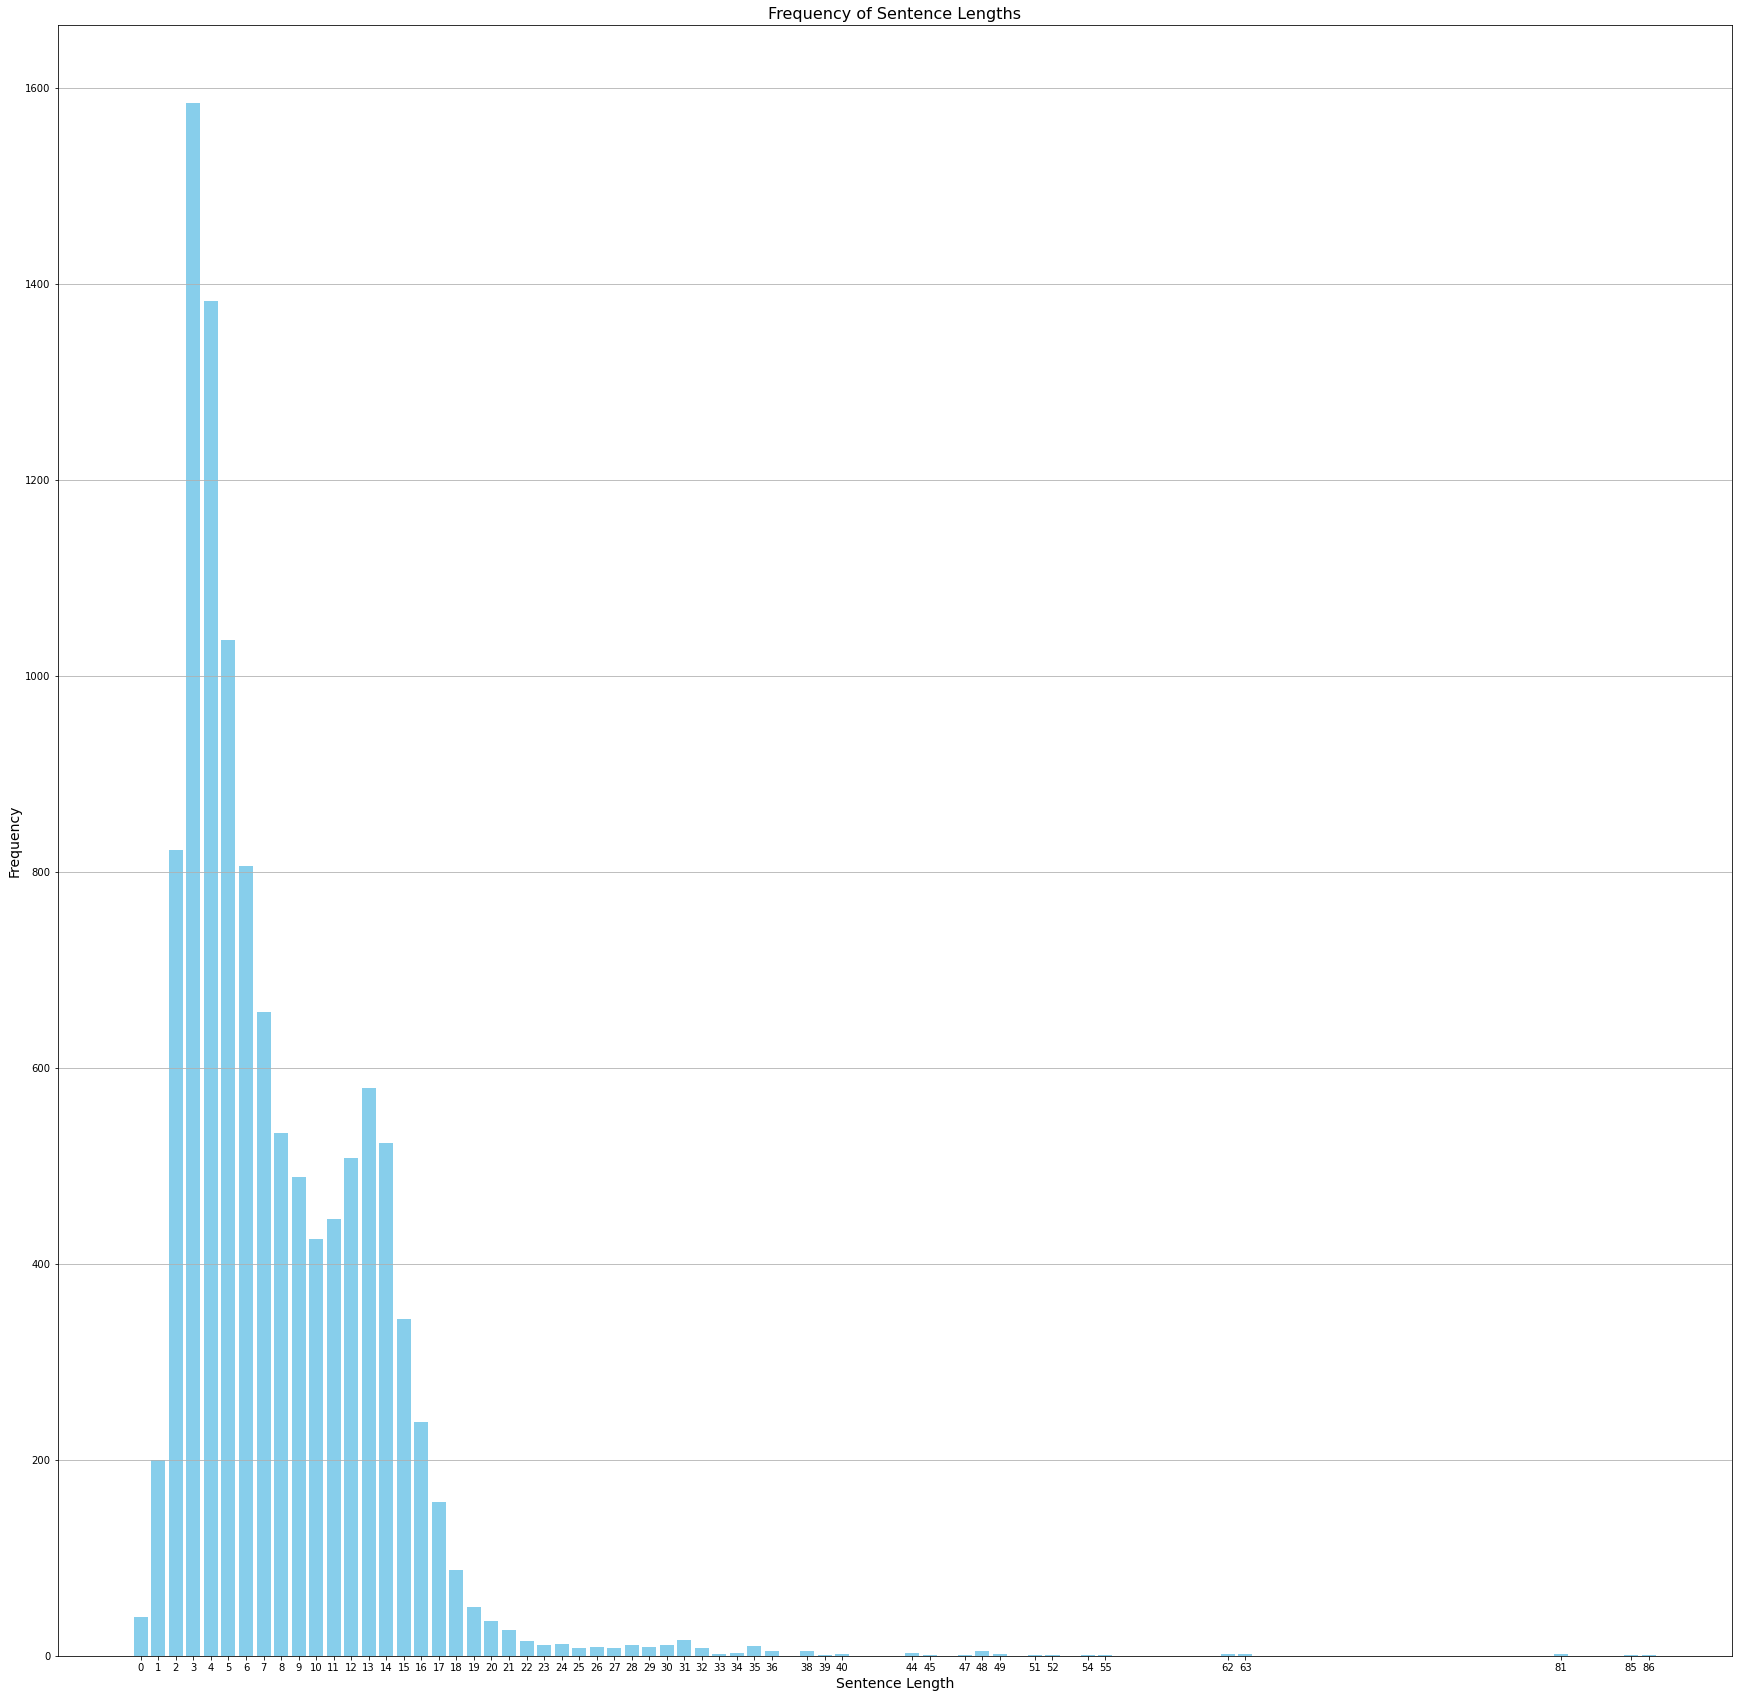

In [255]:
lengths, counts = zip(*length_frequency.items())

plt.figure(figsize=(30,30))
plt.bar(lengths, counts, color='skyblue')
plt.xlabel('Sentence Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Sentence Lengths', fontsize=16)
plt.xticks(lengths)  # Show all lengths on the x-axis
plt.grid(axis='y')

plt.show()


- Pad sequences

In [259]:
X = pad_sequences(X, maxlen=max_len_half, padding='post')
y = pad_sequences(y, maxlen=max_len_half, padding='post')

In [263]:
len(X[55]), len(y[55])

(18, 18)

- Split data into train and test sets

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Define RNN model

In [265]:
rnn_model = Sequential([
        Input(shape=(max_len_half,)),
        Embedding(vocab_size, 64),
        SimpleRNN(32, return_sequences=True),
        TimeDistributed(Dense(vocab_size, activation="softmax"))
    ])

rnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 18, 64)            942400    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 18, 32)            3104      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 18, 14725)         485925    
Total params: 1,431,429
Trainable params: 1,431,429
Non-trainable params: 0
_________________________________________________________________


- Define LSTM model with similar parameters

In [266]:
lstm_model = Sequential([
        Input(shape=(max_len_half,)),
        Embedding(vocab_size, 64),
        LSTM(32, return_sequences=True),
        TimeDistributed(Dense(vocab_size, activation="softmax"))
    ])

lstm_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 18, 64)            942400    
_________________________________________________________________
lstm_11 (LSTM)               (None, 18, 32)            12416     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 18, 14725)         485925    
Total params: 1,440,741
Trainable params: 1,440,741
Non-trainable params: 0
_________________________________________________________________


- Compile models

In [267]:
rnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

- Train RNN and LSTM models

In [268]:
rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/5
140/140 [==============================] - 6s 40ms/step - loss: 8.2979 - accuracy: 0.4668 - val_loss: 4.5549 - val_accuracy: 0.5686
Epoch 2/5
140/140 [==============================] - 5s 38ms/step - loss: 4.1508 - accuracy: 0.5690 - val_loss: 4.0696 - val_accuracy: 0.5676
Epoch 3/5
140/140 [==============================] - 5s 38ms/step - loss: 3.8825 - accuracy: 0.5678 - val_loss: 3.9290 - val_accuracy: 0.5686
Epoch 4/5
140/140 [==============================] - 5s 38ms/step - loss: 3.6709 - accuracy: 0.5709 - val_loss: 3.6937 - val_accuracy: 0.5688
Epoch 5/5
140/140 [==============================] - 5s 38ms/step - loss: 3.4833 - accuracy: 0.5667 - val_loss: 3.6060 - val_accuracy: 0.5689


In [269]:
lstm_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
140/140 [==============================] - 7s 36ms/step - loss: 8.4745 - accuracy: 0.5057 - val_loss: 4.2437 - val_accuracy: 0.5686
Epoch 2/5
140/140 [==============================] - 5s 33ms/step - loss: 4.0445 - accuracy: 0.5638 - val_loss: 4.0243 - val_accuracy: 0.5686
Epoch 3/5
140/140 [==============================] - 5s 33ms/step - loss: 3.8137 - accuracy: 0.5714 - val_loss: 3.7608 - val_accuracy: 0.5687
Epoch 4/5
140/140 [==============================] - 5s 33ms/step - loss: 3.5454 - accuracy: 0.5701 - val_loss: 3.6380 - val_accuracy: 0.5686
Epoch 5/5
140/140 [==============================] - 5s 33ms/step - loss: 3.3985 - accuracy: 0.5723 - val_loss: 3.5893 - val_accuracy: 0.5687


- Evaluate models and show example predictions

In [270]:
print("RNN Model Performance:")
rnn_model.evaluate(X_test, y_test)

RNN Model Performance:
35/35 [==============================] - 1s 21ms/step - loss: 3.6060 - accuracy: 0.5689


[3.6060118675231934, 0.5689088106155396]

In [271]:
print("LSTM Model Performance:")
lstm_model.evaluate(X_test, y_test)

LSTM Model Performance:
35/35 [==============================] - 1s 20ms/step - loss: 3.5893 - accuracy: 0.5687


[3.589278221130371, 0.5687094926834106]

- Show example predictions

In [287]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

example_index = np.random.randint(len(X_test))

input_data = X_test[example_index].reshape(1, -1)

rnn_prediction = rnn_model.predict(input_data)
lstm_prediction = lstm_model.predict(input_data)

rnn_predicted_index = np.argmax(rnn_prediction[0:], axis=-1)
lstm_predicted_index = np.argmax(lstm_prediction[0:], axis=-1)

input_seq = [id_to_wrd[idx] for idx in X_test[example_index] if idx !=0 ] 
output_seq = [id_to_wrd[idx] for idx in y_test[example_index] if idx !=0 ] 


print("Input (first half):", input_seq)
print("Actual (second half):", output_seq)  

# Convert predicted indices to sentences
# rnn_predicted_sentence = tokenizer.sequences_to_texts([rnn_predicted_index])
print(rnn_prediction)
print(rnn_predicted_index)
# lstm_predicted_index = tokenizer.sequences_to_texts([lstm_predicted_index])[0]

# print("RNN Prediction:", rnn_predicted_sentence)
# print("LSTM Prediction:", lstm_predicted_sentence)


Input (first half): ['da', 'my', 'birthdate', 'in', 'certificate', 'is', 'in', 'april', 'but', 'real', 'date', 'is', 'today.', 'but', 'dont', 'publish', 'it.']
Actual (second half): ['i', 'shall', 'give', 'you', 'a', 'special', 'treat', 'if', 'you', 'keep', 'the', 'secret.', 'any', 'way', 'thanks', 'for', 'the', 'wishes<end>']
[[[4.3136341e-05 6.8337387e-05 9.1534319e-05 ... 6.7772526e-05
   6.8253590e-05 6.6771441e-05]
  [5.4157381e-03 2.0313919e-05 2.4592031e-03 ... 2.1319085e-05
   2.1425265e-05 7.3634081e-05]
  [2.8581742e-02 8.5201809e-06 1.1384883e-02 ... 8.8880633e-06
   8.8618845e-06 5.6837136e-05]
  ...
  [5.9943277e-02 4.0358541e-06 2.5878960e-02 ... 4.2887223e-06
   4.2824449e-06 4.0270901e-05]
  [3.7647936e-02 5.5059504e-06 2.1356378e-02 ... 5.7918087e-06
   5.7789644e-06 4.6549700e-05]
  [5.7896966e-01 5.9314266e-07 1.3129269e-02 ... 6.4449353e-07
   6.3602346e-07 1.1287641e-05]]]
[[1024    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0

In [227]:
X_test[0]

array([ 2024,  1447,  1245,  2144, 10928,    22, 10929,  3993,    22,
       10930, 10931,    22, 10932,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [211]:
example_index = np.random.randint(len(X_test))

print("Input (first half):", X_test[example_index])
print("Actual (second half):", y_test[example_index])
print("RNN Prediction:", rnn_model.predict(X_test[example_index].reshape(1, -1)))
print("LSTM Prediction:", lstm_model.predict(X_test[example_index].reshape(1, -1)))

Input (first half): [  15 8370 1865 2436  181    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  

#### Task - 03

- Importing Libraries

In [39]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd, os
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

import matplotlib.pyplot as plt
from PIL import Image
from keras.datasets import fashion_mnist

from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Input, Embedding, Conv2D, Conv2DTranspose, Flatten, Dropout, LeakyReLU
from keras.layers import Reshape, Concatenate

from keras.utils.vis_utils import plot_model

|          | 0/? [00:00<?, ?it/s]

- Load dataset 'Fashion MNIST'

In [40]:
train_csv_path = "/kaggle/input/fashionmnist/fashion-mnist_train.csv"
test_csv_path = "/kaggle/input/fashionmnist/fashion-mnist_test.csv"

In [ ]:
# def load_real_samples(train_csv_path,test_csv_path):
    
#     train_data = pd.read_csv(train_csv_path)
#     X_train = train_data.iloc[:, 1:].values  
#     y_train = train_data.iloc[:, 0].values    

#     X = np.expand_dims(X_train, axis=-1)
#     X = X.astype('float32')
#     X = (X - 127.5) / 127.5
#     return [X, y_train]

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print('X - Shape', trainX.shape)

print('Y- Shape', trainy.shape)

print('Classes : ', np.unique(trainy))

X - Shape (60000, 28, 28)
Y- Shape (60000,)
Classes :  [0 1 2 3 4 5 6 7 8 9]


- Discriminator Model Architecture and plot 

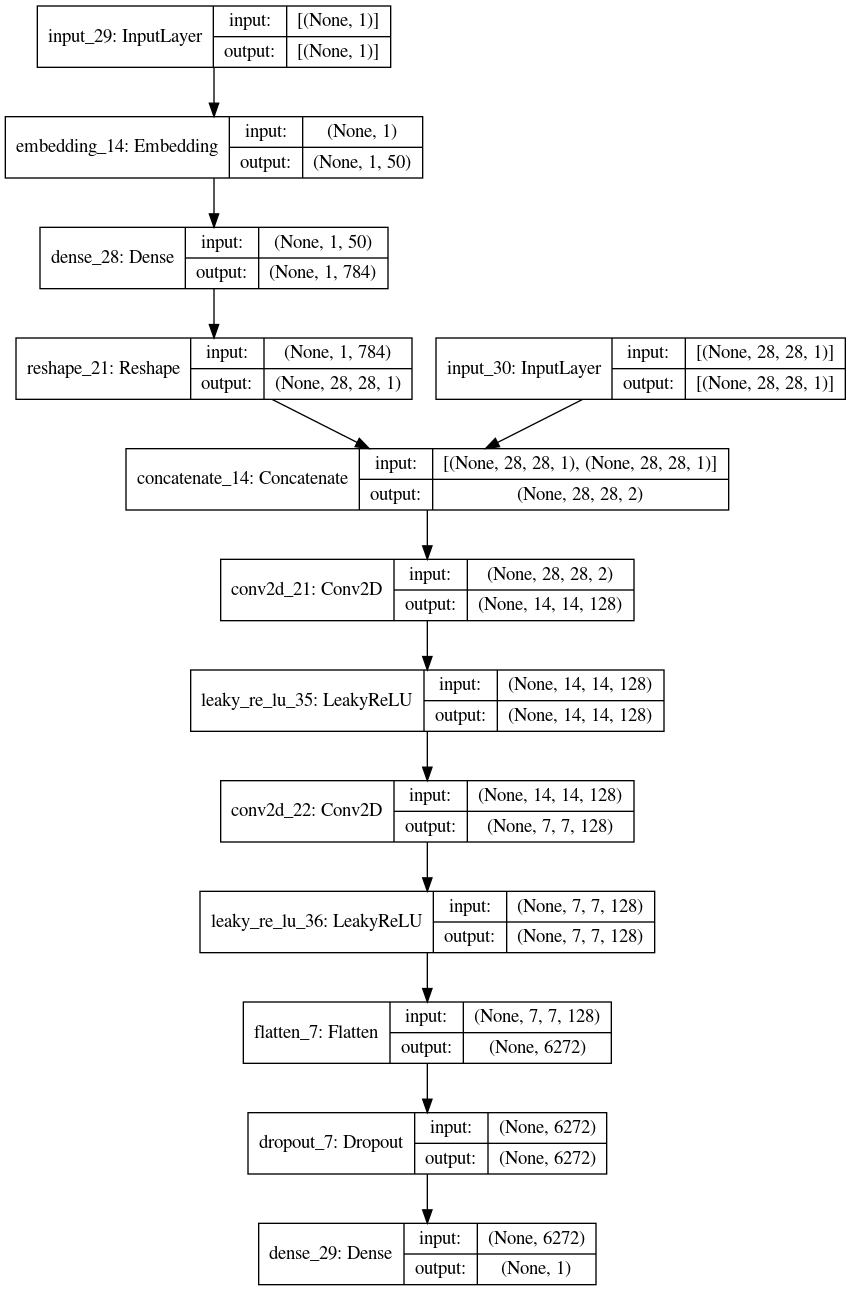

In [41]:
def define_discriminator(in_shape=(28,28,1), n_classes=10):
    
    in_label = Input(shape=(1,))    
    li = Embedding(n_classes, 50)(in_label)
    # scale up to image dimensions with linear activation
    n_nodes = in_shape[0] * in_shape[1]
    
    li = Dense(n_nodes)(li)
    li = Reshape((in_shape[0], in_shape[1], 1))(li)
    
    # Image Input 28x28
    in_image = Input(shape=in_shape)
    merge = Concatenate()([in_image, li])
    
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    
    fe = Flatten()(fe)
    fe = Dropout(0.4)(fe)
    
    out_layer = Dense(1, activation='sigmoid')(fe)
    
    model = Model([in_image, in_label], out_layer)
    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
    
discriminator = define_discriminator()
    
plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

- Generator Model Architecture and plot 

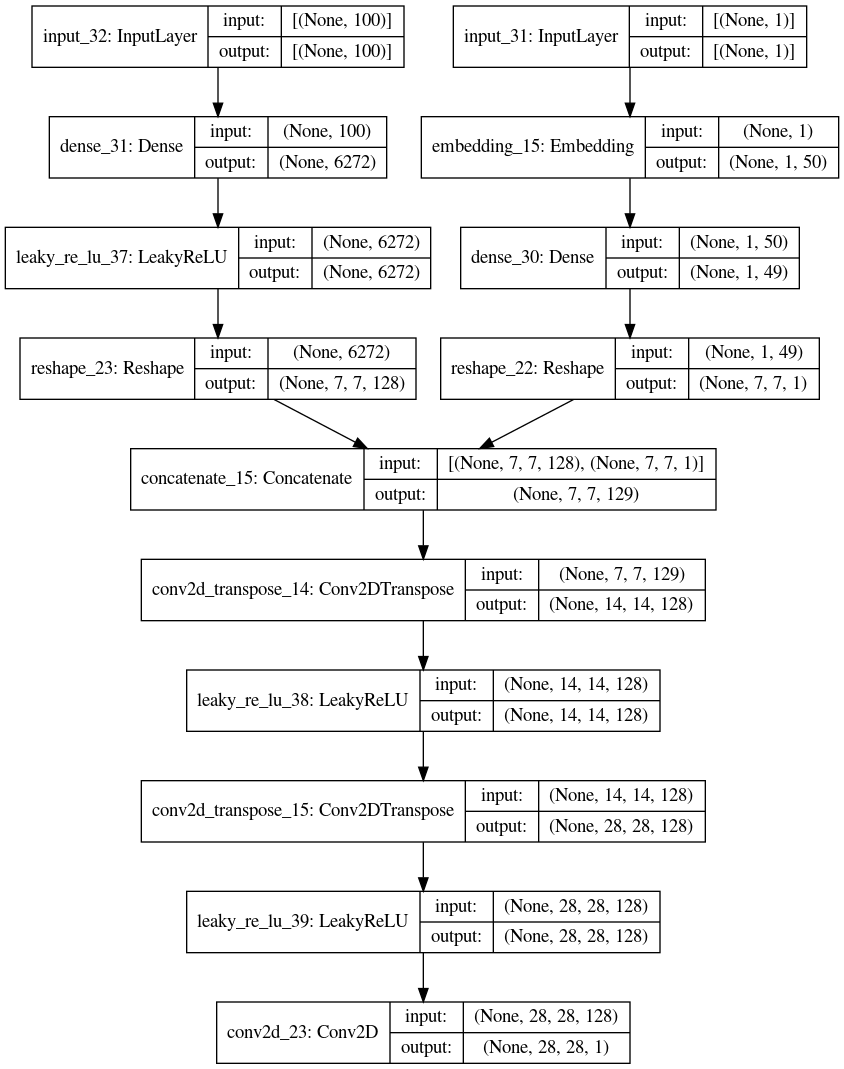

In [42]:
def define_generator(latent_dim, n_classes=10):
    
    in_label = Input(shape=(1,))
    li = Embedding(n_classes, 50)(in_label)
    n_nodes = 7 * 7
    li = Dense(n_nodes)(li)
    
    li = Reshape((7, 7, 1))(li)
    
    # Image generator input
    in_lat = Input(shape=(latent_dim,))
    
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((7, 7, 128))(gen)
    
    # merge image gen and label input
    merge = Concatenate()([gen, li])
    
    # upsample to 14x14
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge) 
    gen = LeakyReLU(alpha=0.2)(gen)
    
    # upsample to 28x28
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen) 
    gen = LeakyReLU(alpha=0.2)(gen)
    
    out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
    
    model = Model([in_lat, in_label], out_layer)
    return model

latent_dim = 100
generator = define_generator(latent_dim)

plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

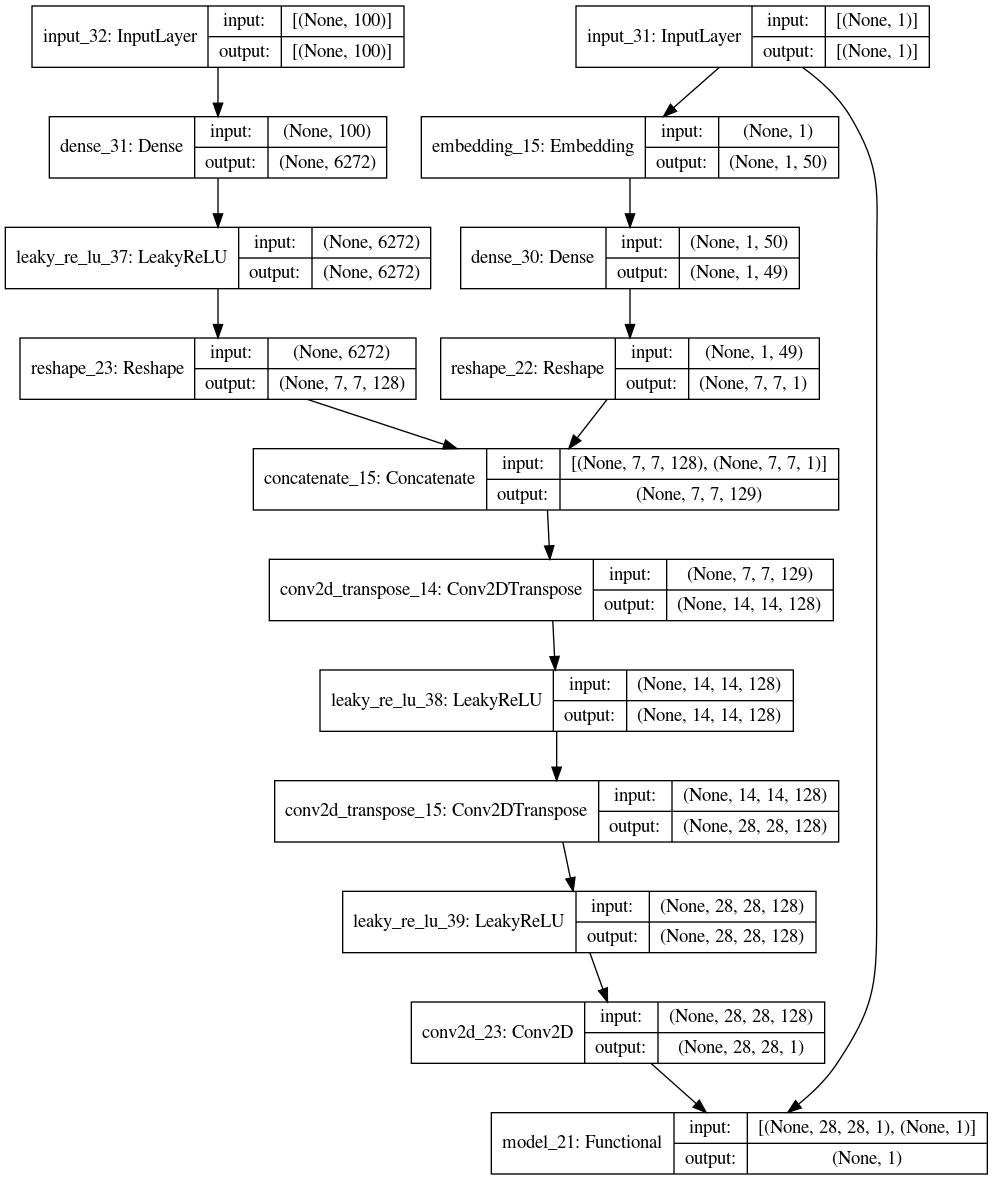

In [43]:
# define the combined generator and discriminator model, for updating the generator

def define_gan(generator, discriminator):
    discriminator.trainable = False
    
    gen_noise, gen_label = generator.input
    
    gen_output = generator.output
    
    # connect image output and label input from generator as inputs to discriminator
    gan_output = discriminator([gen_output, gen_label])
    
    model = Model([gen_noise, gen_label], gan_output)
    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    
    return model

model = define_gan(generator, discriminator)

plot_model(model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

- Load Real Samples and Generate Real Samples functions

In [44]:
def load_real_samples():
    (trainX, trainy), (_, _) = fashion_mnist.load_data()
    X = np.expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = (X - 127.5) / 127.5
    
    return [X, trainy]

def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = np.random.randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    y = np.ones((n_samples, 1))
    
    return [X, labels], y

- Generate latent points and Generate fake samples functions

In [45]:
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    labels = np.random.randint(0, n_classes, n_samples)
    
    return [x_input, labels]

def generate_fake_samples(generator, latent_dim, n_samples):
    x_input, labels = generate_latent_points(latent_dim, n_samples)
    images = generator.predict([x_input, labels])
    y = np.zeros((n_samples, 1))
    
    return [images, labels], y

- Functions to save the Generated image 

In [46]:
def save_plot(examples, epoch, n=10):
    plt.figure(figsize=(10,5))
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i], cmap='gray_r')
        
    filename = 'plot_post_epoch_%03d.png' % (epoch+1) 
    plt.savefig(filename)
    plt.close()

def summarize_performance(epoch, generator, discriminator, dataset, latent_dim, n_samples=100):
    [X_real, labels_real], y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = discriminator.evaluate([X_real, labels_real], y_real, verbose=0)
    
    [X_fake, labels], y_fake = generate_fake_samples(generator, latent_dim, n_samples)
    _, acc_fake = discriminator.evaluate([X_fake, labels], y_fake, verbose=0)

    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    
    save_plot(X_fake, epoch)
    
    filename = 'generator_model%03d.h5' % (epoch + 1)
    generator.save(filename)

In [48]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
        g_losses, d_losses = list(), list()
        for j in range(bat_per_epo):
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            
            #Train & Update Discriminator weights for real data
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)           
            
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            #Train & Update Discriminator weights for fake data
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            
            #X, y = np.vstack(([X_real, labels_real], [X_fake, labels])), np.vstack((y_real, y_fake))
            d_loss = (d_loss1 + d_loss2) / 2.0
            
            # prepare points in latent space as input for the generator
            [x_input, labels_input] = generate_latent_points(latent_dim, n_batch)

            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))

            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([x_input, labels_input], y_gan)
            
            g_losses.append(g_loss)
            d_losses.append(d_loss)

        print('>Epoch %d, Discriminator Loss=%.3f, Generator Loss=%.3f' % (i+1, np.mean(d_losses), np.mean(g_losses)))
        
        # evaluate the model every n_eval epochs
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
            

In [49]:
latent_points, labels = generate_latent_points(100, 100)

labels = np.asarray([x for _ in range(10) for x in range(10)])

discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
dataset = load_real_samples()

train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs = 100)

>Epoch 1, Discriminator Loss=0.639, Generator Loss=0.853
>Epoch 2, Discriminator Loss=0.657, Generator Loss=0.788
>Epoch 3, Discriminator Loss=0.659, Generator Loss=0.791
>Epoch 4, Discriminator Loss=0.656, Generator Loss=0.796
>Epoch 5, Discriminator Loss=0.658, Generator Loss=0.795
>Epoch 6, Discriminator Loss=0.657, Generator Loss=0.798
>Epoch 7, Discriminator Loss=0.661, Generator Loss=0.790
>Epoch 8, Discriminator Loss=0.659, Generator Loss=0.793
>Epoch 9, Discriminator Loss=0.665, Generator Loss=0.786
>Epoch 10, Discriminator Loss=0.664, Generator Loss=0.786
>Accuracy real: 64%, fake: 81%
>Epoch 11, Discriminator Loss=0.664, Generator Loss=0.786
>Epoch 12, Discriminator Loss=0.663, Generator Loss=0.787
>Epoch 13, Discriminator Loss=0.665, Generator Loss=0.789
>Epoch 14, Discriminator Loss=0.666, Generator Loss=0.783
>Epoch 15, Discriminator Loss=0.668, Generator Loss=0.784
>Epoch 16, Discriminator Loss=0.667, Generator Loss=0.787
>Epoch 17, Discriminator Loss=0.667, Generator Los

#### Plot to verify the by generating 100 random images by generator after 50 and 100 epochs

- After 50 Epochs

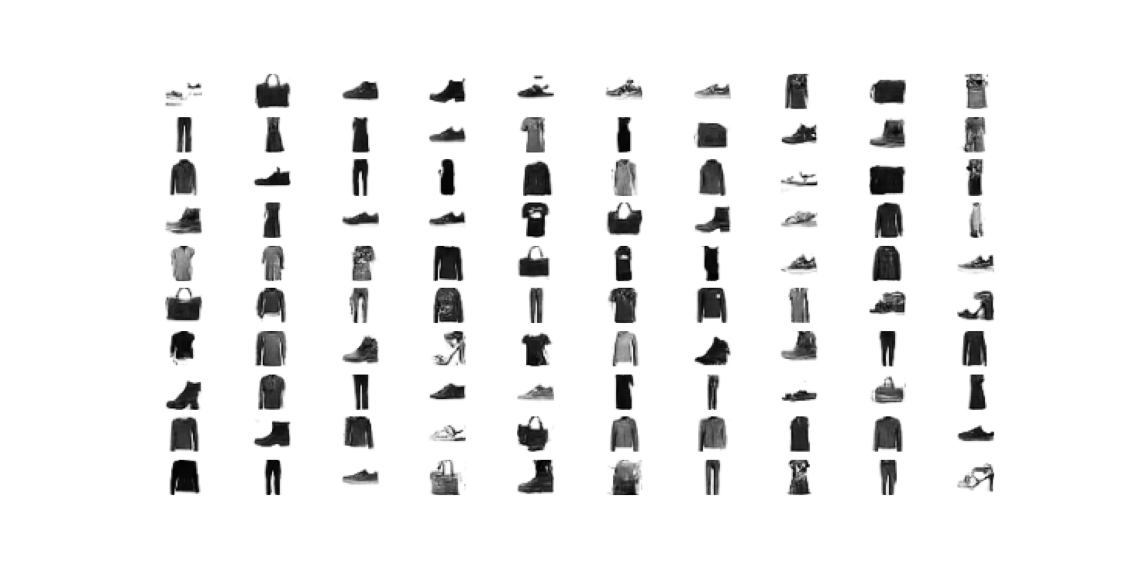

In [60]:
PATH = '/kaggle/working/'

plt.figure(figsize=(20,20))
plt.axis('off')

plt.imshow(plt.imread(PATH +'plot_post_epoch_050.png'))
plt.show()

- After 100 epochs

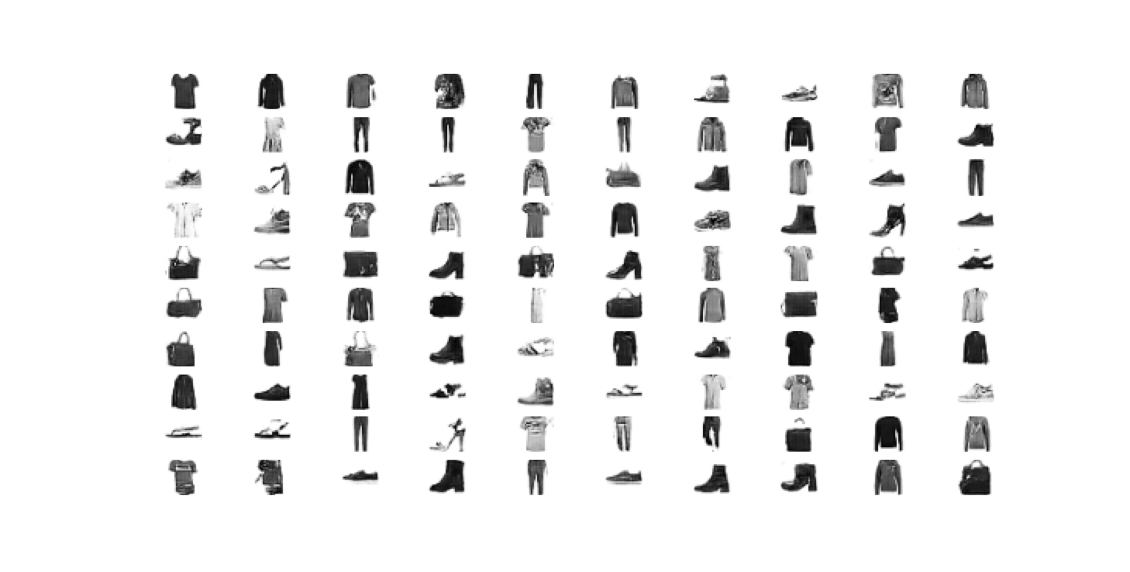

In [59]:
plt.figure(figsize=(20,15))
plt.axis('off')

plt.imshow(plt.imread(PATH +'plot_post_epoch_100.png'))
plt.show()

- Function to print the generated images with vertical labels

In [113]:
label_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def show_plot(images, n1, n2):
    fig, axs = plt.subplots(n1, n2, figsize=(n2 * 2, n1 * 2))
    fig.tight_layout(pad=3.0)

    for i in range(n1):
        for j in range(n2):
            index = i * n2 + j
            axs[i, j].imshow(images[index].reshape(28, 28), cmap='gray')
            axs[i, j].axis('off')

            if i == 0:
                axs[i, j].set_title(f'{label_mapping[j]}', fontsize=16, fontweight='bold')

    for i in range(n1):
        axs[i, 0].set_ylabel(f'Image {i + 1}', fontsize=14, fontweight='bold')

    plt.show()

#### Printing 4 Images for each class

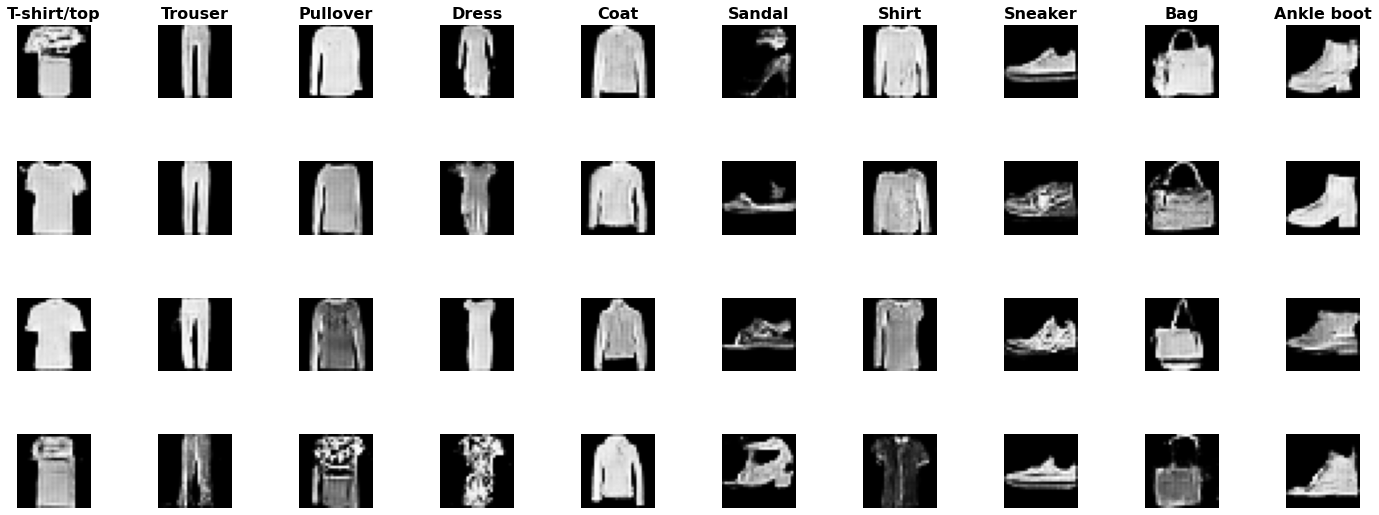

In [114]:
from keras.models import load_model
PATH = '/kaggle/working/' 
model = load_model(PATH + 'generator_model100.h5')

latent_points, labels = generate_latent_points(100, 40)
temp = [x for _ in range(4) for x in range(10)]
labels = np.asarray(temp)

X = model.predict([latent_points, labels])
X = (X + 1) / 2.0

n1 = 4  # images per label
n2 = 10 # number of labels
show_plot(X, n1, n2)